#### Training On Before Augmented Data

In [1]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet import ResNet101, preprocess_input

In [2]:
img_width=224; img_height=224
batch_size=8
TRAINING_DIR = '/insofe/Projects/Some_Project/Tensorflow/BCS challenge/sairam/train' 

train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   rotation_range=30,
                                   zoom_range=0.4,
                                   horizontal_flip=True
                                   )

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    target_size=(img_height, img_width))



VALIDATION_DIR = '/insofe/Projects/Some_Project/Tensorflow/BCS challenge/sairam/valid'

validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)



validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=batch_size,
                                                              class_mode='categorical',
                                                              target_size=(img_height, img_width)
                                                             )

Found 103 images belonging to 4 classes.
Found 29 images belonging to 4 classes.


In [3]:

callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')        
# autosave best Model
best_model_file = 'new_models/resnet101.h5'
best_model = ModelCheckpoint(best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)

resnet101_base = ResNet101(include_top=True,
                           input_tensor=None, input_shape=(img_height, img_width,3))

In [5]:
print('Adding new layers...')
output = resnet101_base.get_layer(index = -1).output  
output = Flatten()(output)
# let's add a fully-connected layer
output = Dense(512,activation = "relu")(output)
output = BatchNormalization()(output)
output = Dropout(0.2)(output)
output = Dense(512,activation = "relu")(output)
output = BatchNormalization()(output)
output = Dropout(0.2)(output)
# and a logistic layer -- let's say we have 4 classes
output = Dense(4, activation='softmax')(output)
print('New layers added!')

Adding new layers...
New layers added!


In [6]:
resnet101_model = Model(resnet101_base.input, output)
for layer in resnet101_model.layers[:-7]:
    layer.trainable = False

resnet101_model.summary()

resnet101_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics =['accuracy'])

history = resnet101_model.fit_generator(train_generator,
                              epochs=30,
                              verbose=1,
                              validation_data=validation_generator,
                              callbacks = [callbacks, best_model]
                              )

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

C:\Users\saira\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
 11/309 [>.............................] - ETA: 8:21 - loss: 2.4986 - accuracy: 0.2863

KeyboardInterrupt: 

In [6]:
target_dir = 'model_files/'
if not os.path.exists(target_dir):
    os.mkdir(target_dir)
resnet101_model.save(target_dir + 'resnet101_model.h5')
resnet101_model.save_weights(target_dir + 'resnet101_weights.h5')

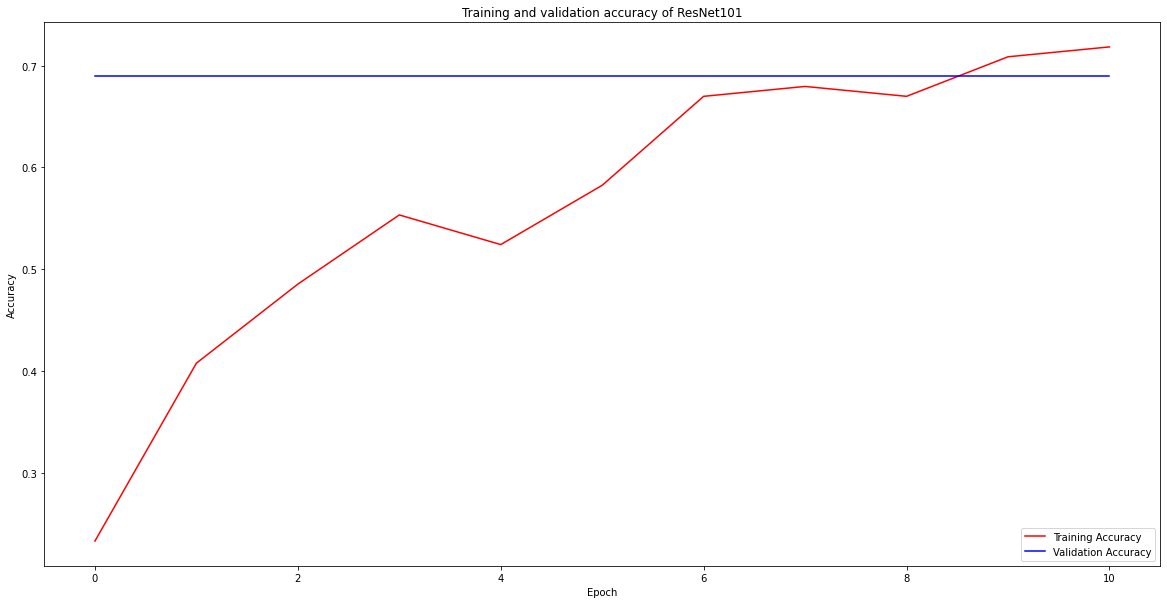

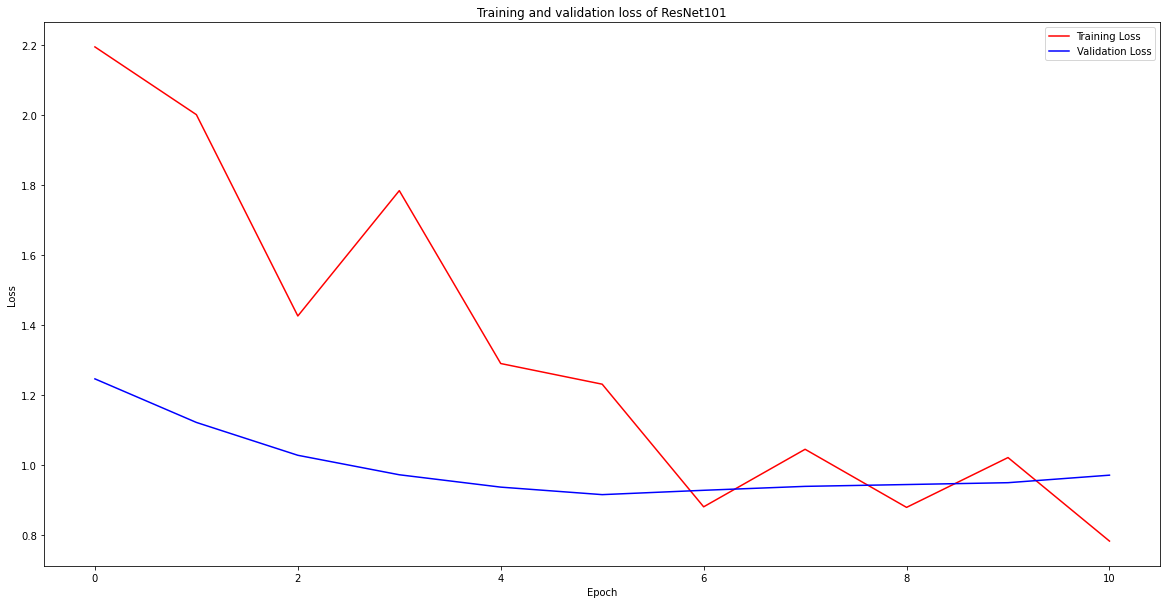

In [8]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

output_dir = 'output_images/'
if not os.path.exists(output_dir):
    os.mkdir(output_dir)

fig = plt.figure(figsize=(20,10))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy of ResNet101')
#plt.ylim([0.7, 1])
plt.legend(loc='lower right')
#plt.show()
fig.savefig('output_images/Accuracy_curve_resnet101_drop_batch_256.jpg')

fig2 = plt.figure(figsize=(20,10))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss of ResNet101')
fig2.savefig('output_images/Loss_curve_resnet101_drop_batch_256.jpg')

#### Training On After Augmented Data

In [2]:
img_width=224; img_height=224
batch_size=8
TRAINING_DIR = '/insofe/Projects/Some_Project/Tensorflow/BCS challenge/Chandra_BCS_Challange/data/train/' 

train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   rotation_range=30,
                                   zoom_range=0.4,
                                   horizontal_flip=True
                                   )

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    target_size=(img_height, img_width))



VALIDATION_DIR = '/insofe/Projects/Some_Project/Tensorflow/BCS challenge/Chandra_BCS_Challange/data/valid/'

validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)



validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=batch_size,
                                                              class_mode='categorical',
                                                              target_size=(img_height, img_width)
                                                             )

Found 2466 images belonging to 4 classes.
Found 719 images belonging to 4 classes.


In [11]:

callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')        
# autosave best Model
best_model_file = '/After_augmented_resnet101_drop_batch_best_weights_256.h5'
best_model = ModelCheckpoint(best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)

resnet101_base = ResNet101(include_top=True,
                           input_tensor=None, input_shape=(img_height, img_width,3))

In [4]:
print('Adding new layers...')
output = resnet101_base.get_layer(index = -1).output  
output = Flatten()(output)
# let's add a fully-connected layer
output = Dense(512,activation = "relu")(output)
output = BatchNormalization()(output)
output = Dropout(0.2)(output)
output = Dense(512,activation = "relu")(output)
output = BatchNormalization()(output)
output = Dropout(0.2)(output)
# and a logistic layer -- let's say we have 4 classes
output = Dense(4, activation='softmax')(output)
print('New layers added!')

Adding new layers...
New layers added!


In [5]:
resnet101_model = Model(resnet101_base.input, output)
for layer in resnet101_model.layers[:-7]:
    layer.trainable = False

resnet101_model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [6]:
resnet101_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics =['accuracy'])

history = resnet101_model.fit_generator(train_generator,
                              epochs=30,
                              verbose=1,
                              validation_data=validation_generator,
                              callbacks = [callbacks, best_model]
                              )

C:\Users\saira\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
309/309 [==============================] - 700s 2s/step - loss: 1.6024 - accuracy: 0.4940 - val_loss: 0.9252 - val_accuracy: 0.6996
Epoch 2/30
309/309 [==============================] - 1076s 3s/step - loss: 0.9238 - accuracy: 0.6636 - val_loss: 1.0555 - val_accuracy: 0.6273
Epoch 3/30
309/309 [==============================] - 1207s 4s/step - loss: 0.8375 - accuracy: 0.6941 - val_loss: 1.1087 - val_accuracy: 0.7038
Epoch 4/30
309/309 [==============================] - 826s 3s/step - loss: 0.7480 - accuracy: 0.7302 - val_loss: 1.2143 - val_accuracy: 0.7121
Epoch 5/30
309/309 [==============================] - 700s 2s/step - loss: 0.7999 - accuracy: 0.7021 - val_loss: 1.1307 - val_accuracy: 0.6871
Epoch 6/30
309/309 [==============================] - 664s 2s/step - loss: 0.7749 - accuracy: 0.7085 - val_loss: 1.1603 - val_accuracy: 0.6940
Epoch 00006: early stopping


In [7]:
target_dir = 'new_models/'
resnet101_model.save(target_dir + 'resnet101_model.h5')
resnet101_model.save_weights(target_dir + 'resnet101_weights.h5')

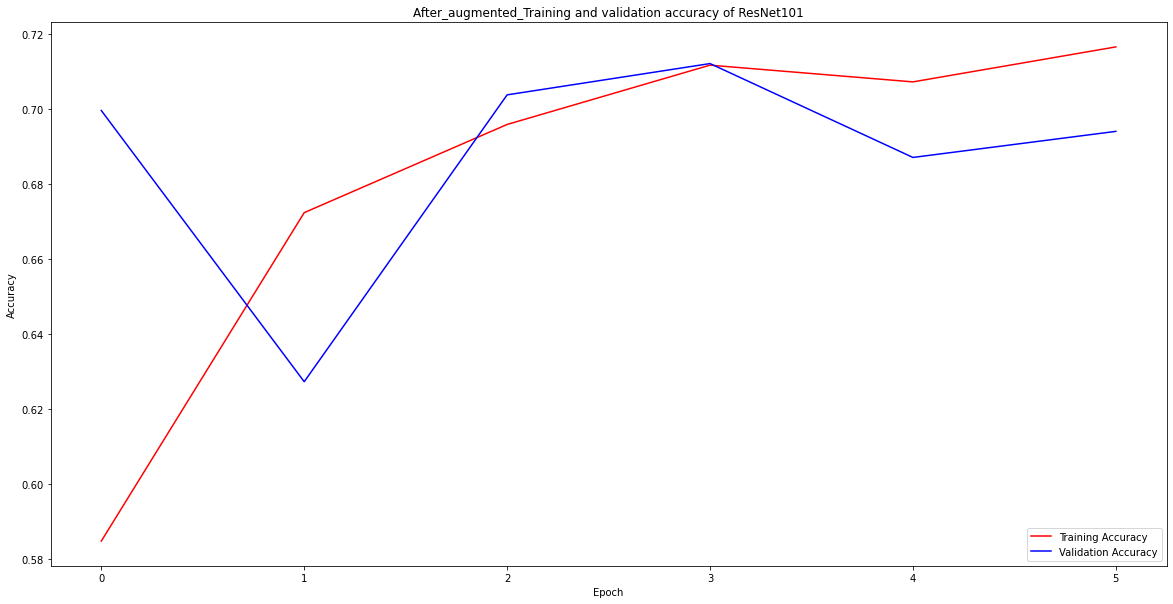

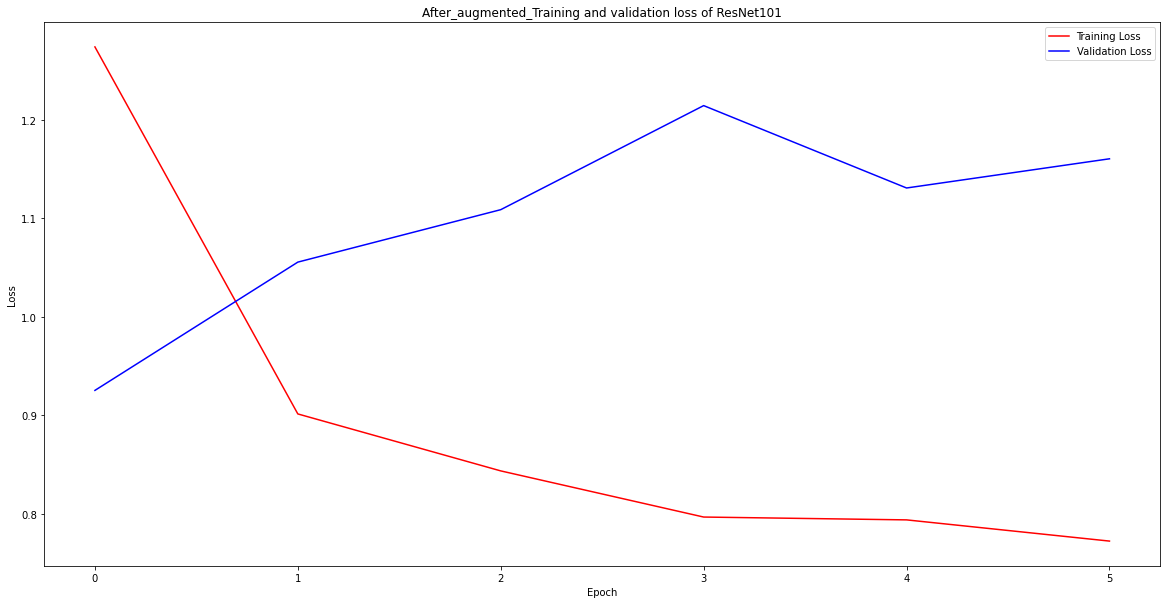

In [8]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

output_dir = 'output_images/'
if not os.path.exists(output_dir):
    os.mkdir(output_dir)

fig = plt.figure(figsize=(20,10))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('After_augmented_Training and validation accuracy of ResNet101')
#plt.ylim([0.7, 1])
plt.legend(loc='lower right')
#plt.show()
fig.savefig('After_augmented & filters & transformations Accuracy_curve_resnet101_drop_batch_256.jpg')

fig2 = plt.figure(figsize=(20,10))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('After_augmented_Training and validation loss of ResNet101')
fig2.savefig('After_augmented & filters & transformation_Loss_curve_resnet101_drop_batch_256.jpg')

#### With the resnet model train & valid Accuracy are good. but the loss fluktuating up & down.